Import all required libraries and define the given facts for the problem

In [2]:
import numpy as np
import cvxpy as cp

m = 29
n = 36

P = np.matrix([
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,]
])

e = np.matrix([
  0.000000,
  1.000000,
  2.000000,
  3.000000,
  4.000000,
  5.000000,
  6.000000,
  7.000000,
  8.000000,
  16.000000,
  16.600000,
  17.200000,
  17.800000,
  18.400000,
  19.000000,
  19.600000,
  20.200000,
  18.000000,
  17.000000,
  16.000000,
  15.000000,
  14.000000,
  13.000000,
  12.000000,
  11.000000,
  10.000000,
  9.000000,
  8.000000,
  7.000000,
  6.000000,
  5.000000,
  4.000000,
  3.000000,
  2.000000,
  1.000000,
  0.000000,
]).T

rho = 0.002500

Define the time as t>=0 and t<=n.Define the bank balance b, withdrawal w and x investments of m type as optimiation variables. Define optimization problem as to minimize the initial investment

In [3]:
time=[i for i in range(n)]
b=cp.Variable((n,1))
w=cp.Variable((n,1))
x=cp.Variable((m,1))
objective=cp.Minimize(b[0]+np.ones(m).T@x)

Define the constraints defined in the questions

In [4]:
constraints=[w+(P@x)>=e,x>=0,b>=0,w>=0,w<=b] 

In [5]:
for t in range(n-1):
#     t=i+1
    
    constraints.append(b[t+1]==(((1+rho)*b[t])-w[t]))

Define problem using objective and constraints and solve the problem

In [6]:
problem=cp.Problem(objective,constraints)
print("Minimum investment in dollars :", problem.solve())

Minimum investment in dollars : 197.91963226680488


Plot of expense stream

Text(0.5, 1.0, 'Expense Stream')

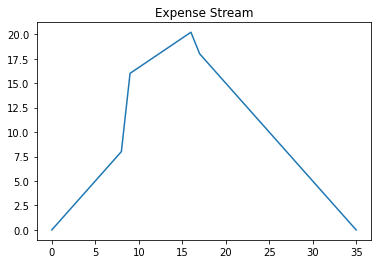

In [7]:
import matplotlib.pyplot as plt
# print(e.T.shape,t.shape)
plt.plot(time,e)
plt.title("Expense Stream")

Plot of payout from m investment types

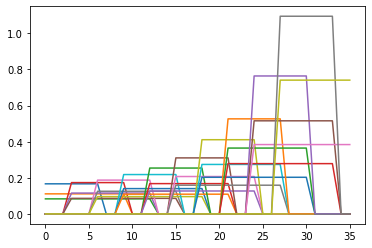

In [8]:
plt.plot(time,P)

In [10]:
Plot of bank balance

SyntaxError: invalid syntax (2918523274.py, line 1)

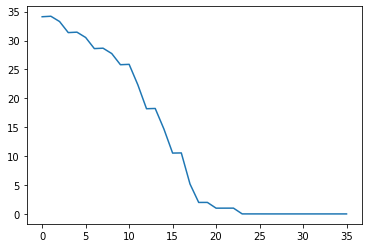

In [9]:
plt.plot(time,b.value)

In [68]:
print("INITIAL INVESTMENT REQUIRED WHEN NO INVESTMENT ARE PURCHASED= ",b.value[0][0],"dollars")


INITIAL INVESTMENT REQUIRED WHEN NO INVESTMENT ARE PURCHASED=  34.11174168279294 dollars
